In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df2 = pd.read_csv("nas-students-data.csv")


In [3]:
df2.head()

,gender,age,category,same_language,siblings,handicap,father_edu,mother_edu,father_occupation,mother_occupation,...,Maths_Percentage,maths_result,science_result,social_result,failed_subjects,overall_result,strong_subjects_count,study_support_score,total_score,average_score
0,2,3,1,1,2,2,2,1,1,1,...,14.81,Fail,Fail,Pass,2,Fail,0,2,94.81,31.603333
1,2,1,2,2,3,2,2,0,1,1,...,16.67,Fail,Fail,Pass,2,Fail,0,2,74.77,24.923333
2,2,4,3,1,2,2,1,0,1,1,...,9.26,Fail,Fail,Fail,3,Fail,0,2,64.71,21.570000
3,2,2,3,1,2,2,2,1,1,1,...,18.52,Fail,Fail,Fail,3,Fail,0,2,77.97,25.990000
4,2,3,3,1,3,2,2,0,1,1,...,31.48,Fail,Fail,Fail,3,Fail,0,2,65.70,21.900000


## Linear Regression

In [4]:
df_encoded = pd.get_dummies(df2, drop_first=True)

X = df_encoded.drop(columns=["Maths_Percentage"], errors='ignore')
y = df_encoded["Maths_Percentage"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

Model Evaluation
R² Score: 0.8307
RMSE: 6.00


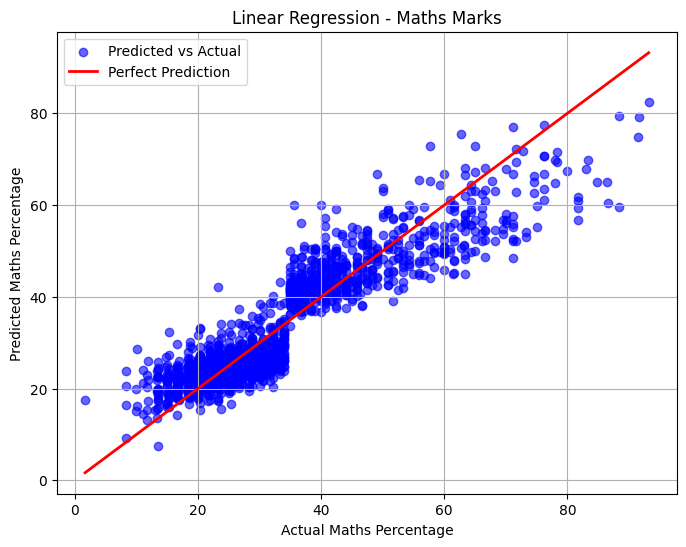

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Maths Percentage")
plt.ylabel("Predicted Maths Percentage")
plt.title("Linear Regression - Maths Marks")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
df_encoded["Predicted_Maths_Percentage"] = model.predict(X)

predicted_marks = df2.copy()
predicted_marks["Predicted_Maths_Percentage"] = model.predict(X)

print(predicted_marks[["Predicted_Maths_Percentage"]])

      Predicted_Maths_Percentage
0                      24.142263
1                      18.496921
2                      19.102920
3                      22.780520
4                      19.304838
...                          ...
8039                   17.999179
8040                   26.507806
8041                   40.080919
8042                   25.327849
8043                   24.190954

[8044 rows x 1 columns]
